Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Reading the csv file

In [2]:
df=pd.read_csv('Onion Prices 2020.csv')
df.head(5)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0


In [3]:
df['commodity'].nunique()

1

In [4]:
df.drop(['commodity','arrival_date'],1,inplace=True)  # Dropping commodity and arrival data as these values do not contribute to our analysis

In [5]:
print('The shape of the dataset is ',df.shape[0],'rows and',df.shape[1],'columns')

The shape of the dataset is  107295 rows and 7 columns


Checking for null values

In [6]:
df.isnull().sum()

state          0
district       0
market         0
variety        0
min_price      0
max_price      0
modal_price    0
dtype: int64

 Visualizing the spead of different variables with the target variable 

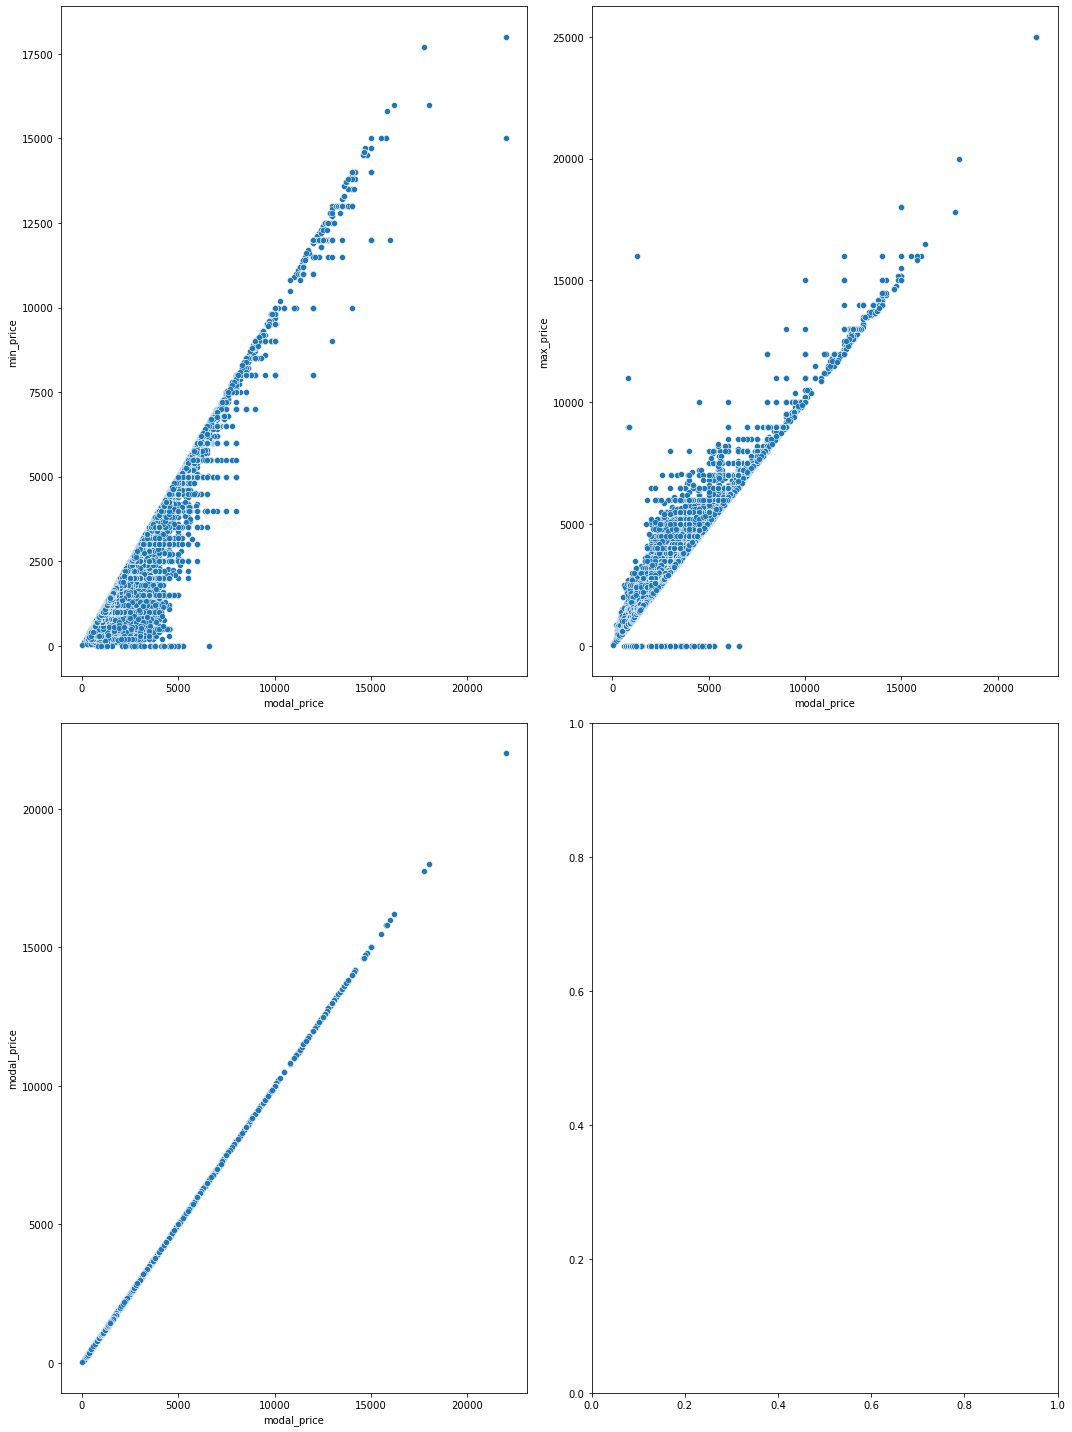

In [7]:
df_num=df.select_dtypes(include=np.number)
fig,ax=plt.subplots(2,2,figsize=[15,20])

for var,subplots in zip(df_num.columns,ax.flatten()):
    z=sns.scatterplot(df_num['modal_price'],df_num[var],ax=subplots);
plt.tight_layout();
plt.show();

Checking for outliers

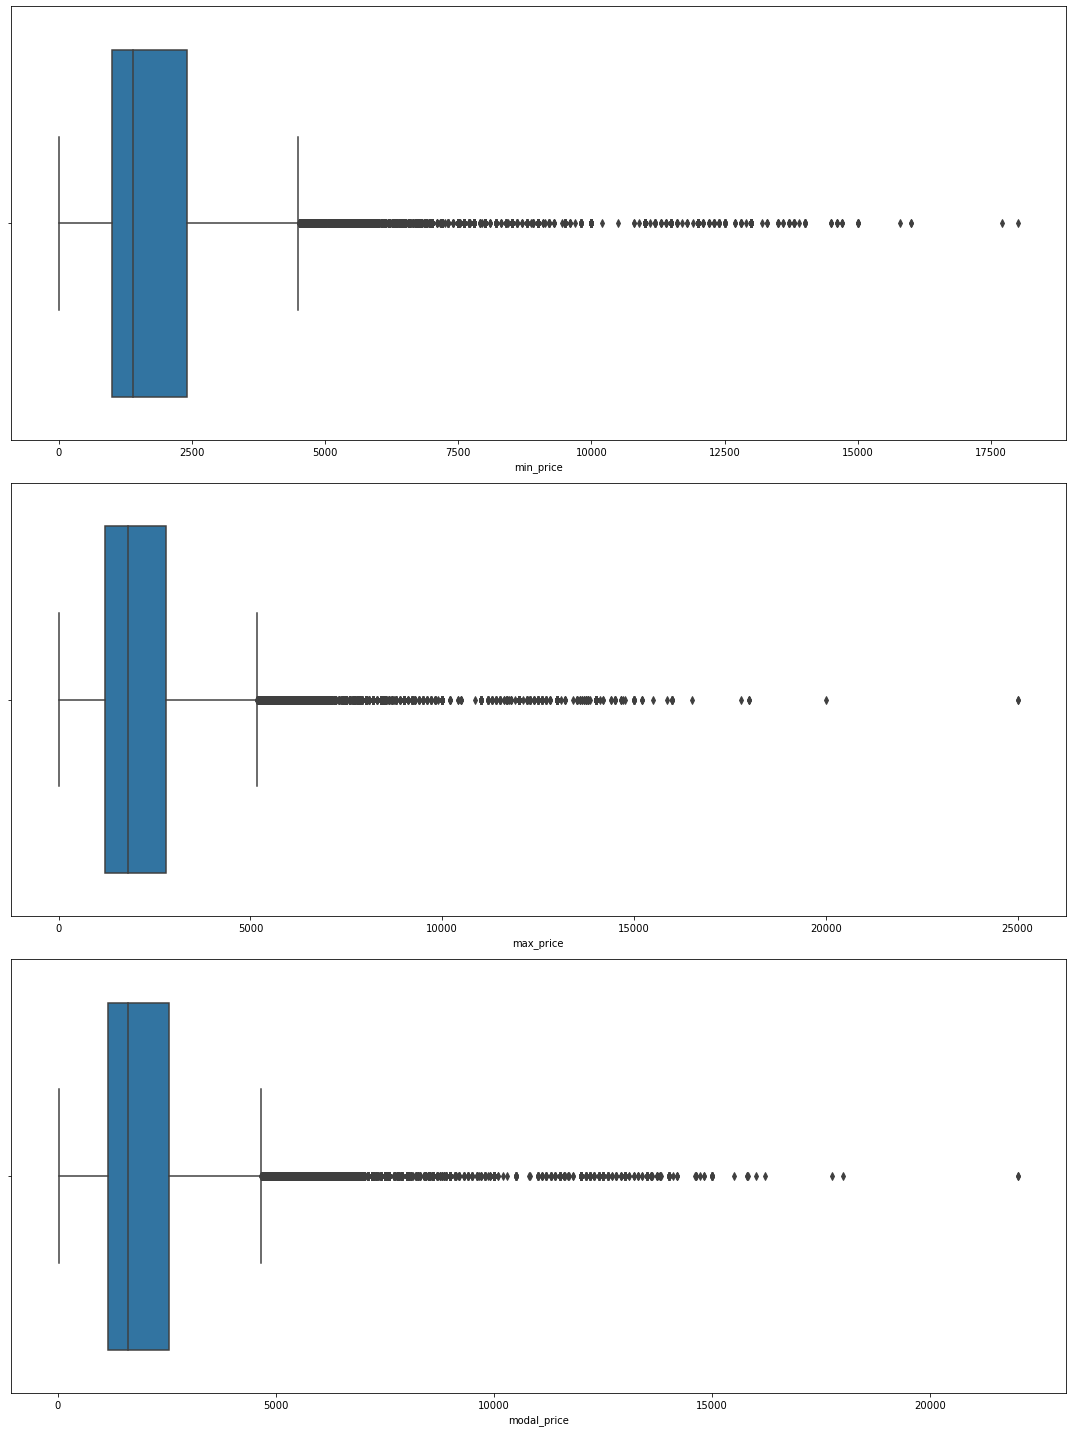

In [8]:
fig,ax=plt.subplots(3,1,figsize=[15,20])

for var,subplots in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(df_num[var],ax=subplots);
plt.tight_layout();
plt.show();

Removing Outliers using IQR method

In [9]:
df['min_price'].quantile(0.75)
df['min_price'].quantile(0.25)
iqr=df['min_price'].quantile(0.95)-df['min_price'].quantile(0.25)
df['min_price'].quantile(0.95)+3*iqr

16200.0

In [10]:
df['min_price']= np.where(df['min_price']>df['min_price'].quantile(0.75),df['min_price'].max(),df['min_price'])

<AxesSubplot:xlabel='min_price'>

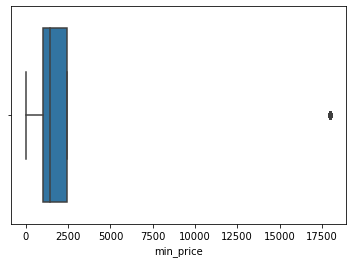

In [11]:
sns.boxplot(df['min_price'])

In [12]:
df['max_price']= np.where(df['max_price']>df['max_price'].quantile(0.75),df['max_price'].max(),df['max_price'])

<AxesSubplot:xlabel='max_price'>

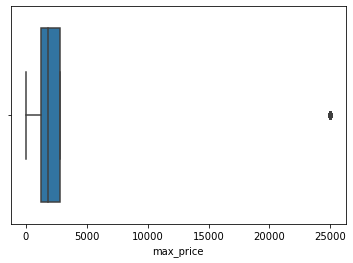

In [13]:
sns.boxplot(df['max_price'])

In [14]:
df['modal_price']= np.where(df['modal_price']>df['modal_price'].quantile(0.75),df['max_price'].max(),df['modal_price'])

<AxesSubplot:xlabel='modal_price'>

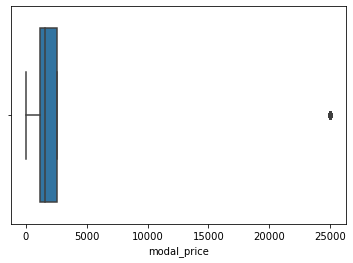

In [15]:
sns.boxplot(df['modal_price'])

After Outlier Treatment

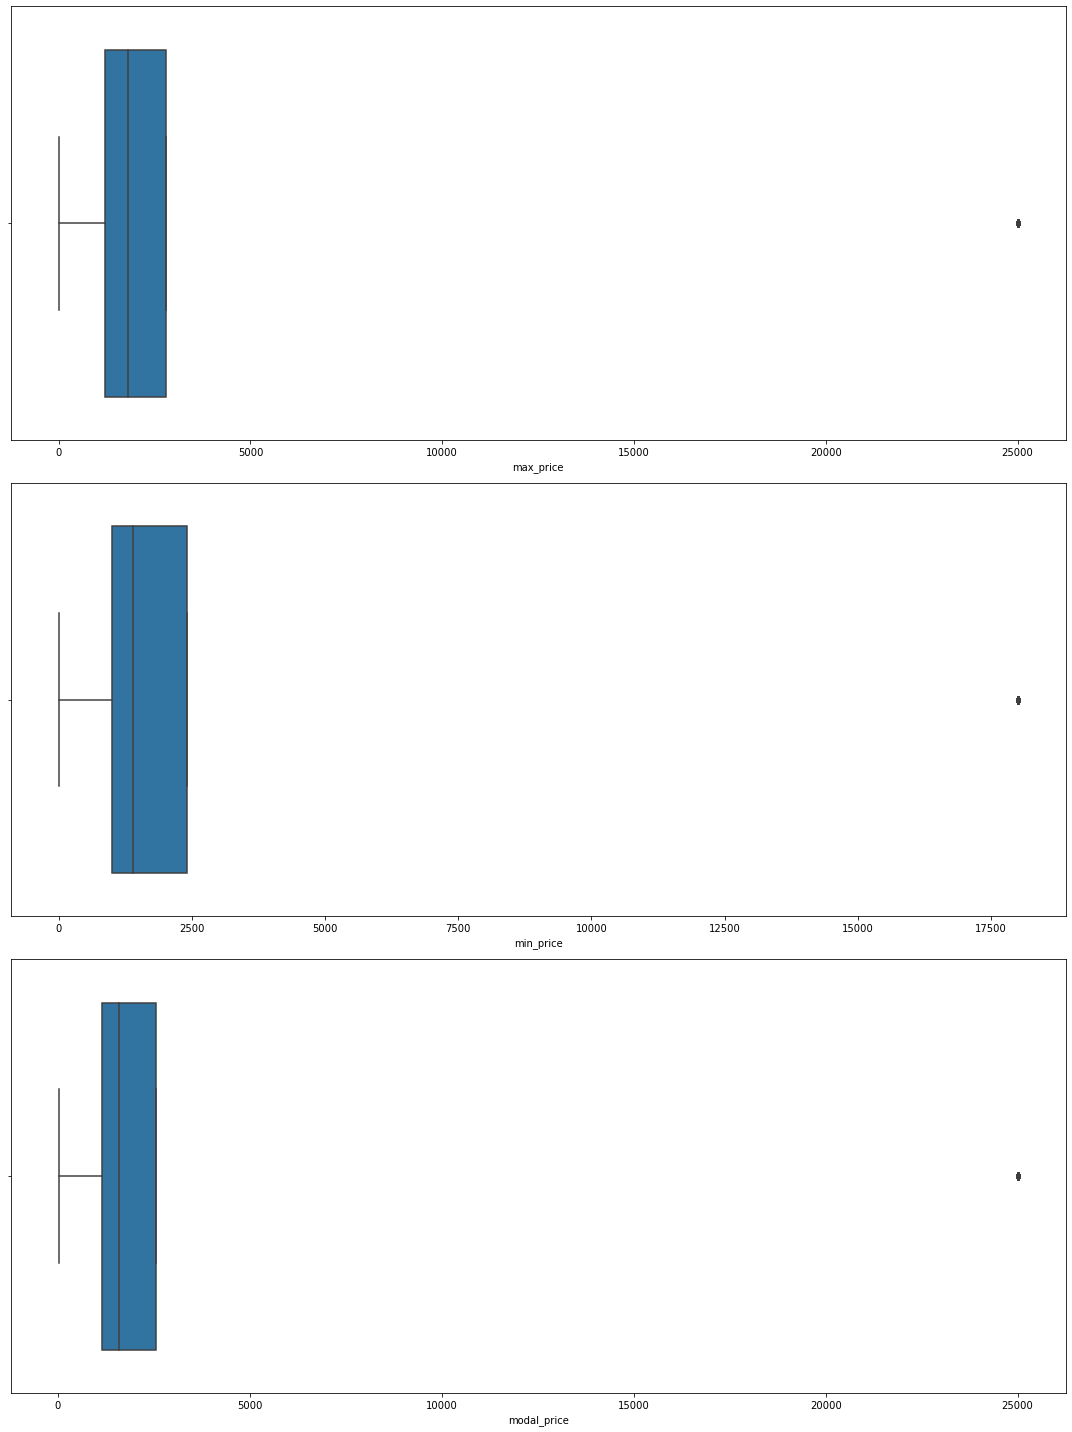

In [16]:
fig,ax=plt.subplots(3,1,figsize=[15,20])
df_num=df[['max_price','min_price','modal_price']]
for var,subplots in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(df_num[var],ax=subplots);
plt.tight_layout();
plt.show();

Encoding Categorical variables before building the regression model

In [17]:
df_cat=df.select_dtypes(include=object)

In [18]:
encode=pd.get_dummies(df_cat,drop_first=True)
encode

,state_Chattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jammu and Kashmir,state_Jharkhand,state_Karnataka,state_Kerala,state_Madhya Pradesh,...,variety_Nasik,variety_Onion,variety_Other,variety_Pole,variety_Puna,variety_Pusa-Red,variety_Red,variety_Small,variety_Telagi,variety_White
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
107291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
107292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
107293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
df_new=pd.concat([df_num,encode],1)
df_new.shape

(107295, 1262)

Train-Test split

In [20]:
from sklearn.model_selection import train_test_split
x=df_new.drop('modal_price',1)
y=df_new['modal_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
import statsmodels.api as sm

In [22]:
model_base=sm.OLS(y_train,x_train).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            modal_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1027.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:10:47   Log-Likelihood:            -8.0698e+05
No. Observations:               85836   AIC:                         1.616e+06
Df Residuals:                   84916   BIC:                         1.624e+06
Df Model:                         919                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
max_price                                            0.4134      0.002    193.034      0.000       0.409       0.418
min_price                                            0.8378      0.003    272.633      0.000       0.832       0.844
state_Chattisgarh                                 -883.3628    347.777     -2.540      0.011   -1565.004    -201.722
state_Goa                                         -766.6749    211.454     -3.626      0.000   -1181.123    -352.226
state_Gujarat                                     -551.8803    462.090     -1.194      0.232   -1457.573     353.812
state_Haryana                                    -1326.3136    463.730     -2.860      0.004   -2235.220    -417.407
state_Himachal Pradesh                            -614.5595    865.025     -0.710      0.477   -2310.001    1080.882
state_Jammu and Kashmir                           -898.3267    395.895     -2.269      0.023   -1674.277    -122.376
state_Jharkhand                                   -407.5408    286.584     -1.422      0.155    -969.242     154.161
state_Karnataka                                  -1009.6765    465.717     -2.168      0.030   -1922.477     -96.875
state_Kerala                                      -929.6056    448.307     -2.074      0.038   -1808.284     -50.927
state_Madhya Pradesh                             -1104.8946    440.312     -2.509      0.012   -1967.902    -241.887
state_Maharashtra                                 -848.7728    456.890     -1.858      0.063   -1744.273      46.727
state_NCT of Delhi                                -525.7823    259.491     -2.026      0.043   -1034.382     -17.183
state_Nagaland                                    -395.2028    404.426     -0.977      0.328   -1187.875     397.469
state_Odisha                                     -1246.8792    461.024     -2.705      0.007   -2150.483    -343.275
state_Punjab                                     -1114.0831    457.265     -2.436      0.015   -2010.318    -217.848
state_Rajasthan                                   -858.2483    330.732     -2.595      0.009   -1506.481    -210.016
state_Telangana                                    383.0456    151.595      2.527      0.012      85.921     680.170
state_Tripura                                    -1468.8628    388.536     -3.781      0.000   -2230.390    -707.335
state_Uttar Pradesh                              -3183.5643    481.152     -6.617      0.000   -4126.618   -2240.511
state_Uttrakhand                                  -719.0266    421.285     -1.707      0.088   -1544.743     106.689
state_West Bengal                                -1251.4861    441.981     -2.832      0.005   -2117.764    -385.208
district_Ahmedabad                       

In [23]:
# very high multicollinearity

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_encode=df_cat.apply(le.fit_transform)
le_encode

,state,district,market,variety
0,0,178,486,9
1,0,178,486,9
2,0,178,486,9
3,0,178,486,9
4,0,178,486,9
...,...,...,...,...
107290,21,290,231,17
107291,21,290,231,17
107292,21,290,231,17
107293,21,290,231,17


In [25]:
df_new2=pd.concat([df_num,le_encode],1)
x=df_new2.drop('modal_price',1)
y=df_new2['modal_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
model_base2=sm.OLS(y_train,x_train).fit()
model_base2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            modal_price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.265e+05
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:11:39   Log-Likelihood:                     -8.1062e+05
No. Observations:               85836   AIC:                                  1.621e+06
Df Residuals:                   85830   BIC:                                  1.621e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
max_price      0.4272      0.002    209.277      0.000       0.423       0.431
min_price      0.8081      0.003    281.513      0.000       0.802       0.814
state        -11.4777      1.832     -6.264      0.000     -15.069      -7.887
district       0.1274      0.119      1.070      0.285      -0.106       0.361
market         0.0948      0.041      2.328      0.020       0.015       0.175
variety        3.5790      2.262      1.582      0.114      -0.854       8.012
==============================================================================
Omnibus:                    39724.129   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873438.648
Skew:                           1.497   Prob(JB):                         0.00
Kurtosis:                      25.691   Cond. No.                     3.92e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature selection using forward and backward methods

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_forw=sfs(estimator=lr,forward=True,k_features='best',scoring='r2')
lr_forw=lr_forw.fit(x_train,y_train)
print(lr_forw.k_feature_names_)
print(lr_forw.k_score_)

('max_price', 'min_price', 'state', 'market')
0.9101251706585091


In [28]:
lr_back=sfs(estimator=lr,forward=False,k_features='best',scoring='r2')
lr_back=lr_back.fit(x_train,y_train)
print(lr_back.k_feature_names_)
print(lr_back.k_score_)

('max_price', 'min_price', 'state', 'market')
0.9101251706585091


In [29]:
new_x_train=x_train[['max_price', 'state', 'district', 'market']]
new_x_test=x_test[['max_price', 'state', 'district', 'market']]

In [30]:
model_base3=sm.OLS(y_train,new_x_train).fit()
model_base3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            modal_price   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          1.663e+05
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:12:01   Log-Likelihood:                     -8.3869e+05
No. Observations:               85836   AIC:                                  1.677e+06
Df Residuals:                   85832   BIC:                                  1.677e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
max_price      0.9246      0.001    661.283      0.000       0.922       0.927
state         40.4357      1.654     24.452      0.000      37.194      43.677
district       0.0800      0.160      0.500      0.617      -0.234       0.394
market        -0.0562      0.055     -1.016      0.310      -0.165       0.052
==============================================================================
Omnibus:                    32229.045   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1764276.355
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                      25.116   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Metrics

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

y_pred=model_base3.predict(new_x_test)

In [32]:
mean_squared_error(y_test,y_pred,squared=False)

4361.501416718308

In [35]:
y_pred_train=model_base3.predict(new_x_train)
mean_squared_error(y_train,y_pred_train,squared=False)

4238.232053572897

In [36]:
model_base3.rsquared #Rsquared of the third model after feature selection

0.8857199262856703

In [66]:
y_df=pd.DataFrame(y_pred,columns=['Predicted values'])
y_test_df=y_test.to_frame(name='Actual Values')

In [67]:
Outcome=pd.concat([y_test_df,y_df],axis=1).reset_index(drop=True)
Outcome

,Actual Values,Predicted values
0,800.0,1588.782990
1,25000.0,23881.788825
2,900.0,1663.330197
3,25000.0,23651.381006
4,1400.0,2181.763305
...,...,...
21454,1200.0,1615.793727
21455,1150.0,1870.141870
21456,1020.0,1769.886606
21457,2050.0,2707.397269
